<a href="https://colab.research.google.com/github/Vishvesh-rao/House-Price-Prediction/blob/main/src.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1 - Importing Libraries

The initial step is to import libraries that are important to preprocess the dataset

In [ ]:
!pip install sweetviz 

     |████████████████████████████████| 15.1 MB 191 kB/s 


In [ ]:
### Generic libraries
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv 
import pickle

### Data set
from sklearn.datasets import fetch_california_housing

### sklearn modules
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score 

### ML algos
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

## Step 2 - Visualizing the data


In [ ]:
data = fetch_california_housing()


In [ ]:
print(data.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
#independent data

df = pd.DataFrame(data = data.data, columns = data.feature_names)
df.shape




(20640, 8)

In [ ]:
df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


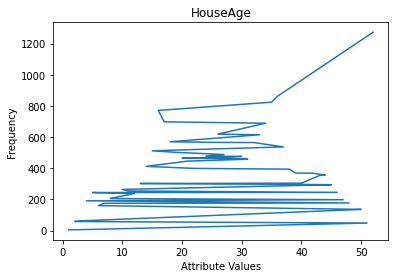

In [ ]:
#dependent data

df["House Price"] = data.target

plt.xlabel('Attribute Values')
# naming the y axis
plt.ylabel('Frequency')
plt.title('HouseAge')

df['HouseAge'].value_counts().plot()


#EXPLORATORY DATA ANALYSIS

In [ ]:

report = sv.analyze(df)

report.show_html("./report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
## Feature Engineering
 
geolocator = Nominatim(user_agent = "geoapiExcercises", timeout=10)


In [ ]:
def location(cords):
  
  Lat = str(cords[0])
  Long = str(cords[1])

  loc = geolocator.reverse(Lat + "," + Long).raw["address"]

  if loc.get("road") is None:
    loc["road"] = None

  if loc.get("county") is None:
    loc["county"] = None
  
  loc_update["county"].append(loc["county"])
  loc_update["road"].append(loc["road"])



In [ ]:
# loc_update = {"county":[],
#               "road":[],
#               "neighbourhood":[]}

# for i,cords in enumerate(df.iloc[:,6:-1].values):

#   if(i<10554):
#     location(cords)
#     pickle.dump(loc_update, open('loc_update.pickle','wb'))

#     if(i%100 == 0):
#       print(i)
  

In [ ]:
loc_update = pickle.load(open("/content/loc_update.pickle","rb"))
loc_update.keys()
loc = pd.DataFrame(loc_update)
loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   road    19507 non-null  object
 1   county  15368 non-null  object
dtypes: object(2)
memory usage: 322.6+ KB


In [ ]:
## Adding the new feature to our dataframe

for i in loc_update.keys():
  df[i] = loc_update[i]

df = df.sample(axis=0, frac=1)

df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Price,road,county
18059,10.2666,24.0,8.063545,1.000000,847.0,2.832776,37.26,-122.02,5.00001,Riverdale Drive,Santa Clara County
7570,4.3646,42.0,5.336170,0.957447,929.0,3.953191,33.89,-118.21,1.16200,South Sloan Avenue,None
20263,2.9185,27.0,4.408879,1.137850,1339.0,3.128505,34.21,-119.19,2.24500,West Roderick Avenue,Ventura County
6786,3.1080,27.0,4.365488,1.085745,2411.0,2.584137,34.10,-118.14,2.31000,Electric Avenue,None
13897,2.1820,15.0,6.047482,1.389928,1756.0,2.526619,34.18,-116.29,0.60800,Verbena Road,San Bernardino County
16229,3.5703,43.0,4.721875,0.912500,721.0,2.253125,37.97,-121.33,0.87400,Grange Avenue,San Joaquin County
4543,2.6875,45.0,4.212766,1.079787,872.0,4.638298,34.02,-118.21,1.29700,East Olympic Boulevard,None
9302,6.4978,27.0,6.718329,0.958221,1928.0,2.598383,38.02,-122.55,3.61500,Montevideo Way,Marin County
9384,6.0238,23.0,4.910714,1.199405,541.0,1.610119,37.89,-122.49,5.00001,Greenwood Beach Road,Marin County
11472,4.0121,19.0,4.951596,1.059732,2422.0,2.494336,33.71,-118.00,2.79700,Main Street,Orange County


In [ ]:
## Dropping lat and long and the Neighbourhood columns

df1 = df.drop(labels = ["Latitude", "Longitude"], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 18059 to 6729
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   House Price  20640 non-null  float64
 7   road         19507 non-null  object 
 8   county       15368 non-null  object 
dtypes: float64(7), object(2)
memory usage: 1.6+ MB


# Using Classification Algorithm To Fill The Missing Categorical values

## Predicting missing Road values

In [ ]:
## applying classification algorithm [ logistic regression ] to find missing road values

missing_idx = []

for i in range(df1.shape[0]):

  if df1["road"][i] is None:
    missing_idx.append(i)

## Independent Parameters
missing_road_X_train = np.array([ [df1["MedInc"][i], df1["AveRooms"][i], df1["AveBedrms"][i] ] for i in range(df1.shape[0]) if i not in missing_idx ])

## Dependend Parameters
missing_road_Y_train = np.array([  df1["road"][i] for i in range(df1.shape[0]) if i not in missing_idx ])

missing_road_X_test = np.array([ [df1["MedInc"][i], df1["AveRooms"][i], df1["AveBedrms"][i] ] for i in range(df1.shape[0]) if i not in missing_idx ])


In [ ]:
# ## Model Initialisation

model_1 = SGDClassifier()

# ## Model Training
model_1.fit(missing_road_X_train, missing_road_Y_train)

missing_road_Y_pred = model_1.predict(missing_road_X_test)

In [ ]:
missing_road_Y_pred[90]



'Studebaker Road'

In [ ]:
## adding the model back to dataframe
from sklearn.preprocessing import LabelEncoder
pd.options.mode.chained_assignment = None  # default='warn'

for n,i in enumerate(missing_idx):
  df1["road"][i] = missing_road_Y_pred[n]

le = LabelEncoder()

df1["road"] =  le.fit_transform(df1["road"] )

## Predicting missing County values

In [ ]:
## applying classification algorithm [ logistic regression ] to find missing county values

missing_idx = []

for i in range(df1.shape[0]):

  if df1["county"][i] is None:
    missing_idx.append(i)

## Independent Parameters
missing_county_X_train = np.array([ [df1["MedInc"][i], df1["AveRooms"][i], df1["AveBedrms"][i] ] for i in range(df1.shape[0]) if i not in missing_idx ])

## Dependend Parameters
missing_county_Y_train = np.array([  df1["county"][i] for i in range(df1.shape[0]) if i not in missing_idx ])

missing_county_X_test = np.array([ [df1["MedInc"][i], df1["AveRooms"][i], df1["AveBedrms"][i] ] for i in range(df1.shape[0]) if i not in missing_idx ])


In [ ]:
## Model Initialisation

model_1 = SGDClassifier()

## Model Training
model_1.fit(missing_county_X_train, missing_county_Y_train)

missing_county_Y_pred = model_1.predict(missing_county_X_test)

In [ ]:
## adding the model back to dataframe
from sklearn.preprocessing import LabelEncoder

for n,i in enumerate(missing_idx):
  df1["county"][i] = missing_county_Y_pred[n]

le = LabelEncoder()

df1["county"] =  le.fit_transform(df1["county"] )

In [ ]:
df4 = df1.drop(labels = ["HouseAge"], axis=1)

report = sv.analyze(df4)

report.show_html("./report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Normalizing Values

In [ ]:
x = df1.iloc[:,1:]

# Normalize values
df1.iloc[:,1:] = (x-x.min())/ (x.max() - x.min())

df1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,House Price,road,county
18059,10.2666,0.450980,0.051164,0.019763,0.023655,0.001723,1.000000,0.723636,0.750000
7570,4.3646,0.803922,0.031830,0.018501,0.025954,0.002624,0.208661,0.829421,0.966667
20263,2.9185,0.509804,0.025256,0.023849,0.037445,0.001960,0.431959,0.964738,0.966667
6786,3.1080,0.509804,0.024949,0.022305,0.067491,0.001522,0.445361,0.308650,0.966667
13897,2.1820,0.274510,0.036872,0.031322,0.049133,0.001476,0.094435,0.906556,0.633333


In [ ]:
# Dependent Values

Y = df1.iloc[:,-3].values
df2 = df1.drop(labels = ["House Price"], axis=1)

X = df2.iloc[:,:].values

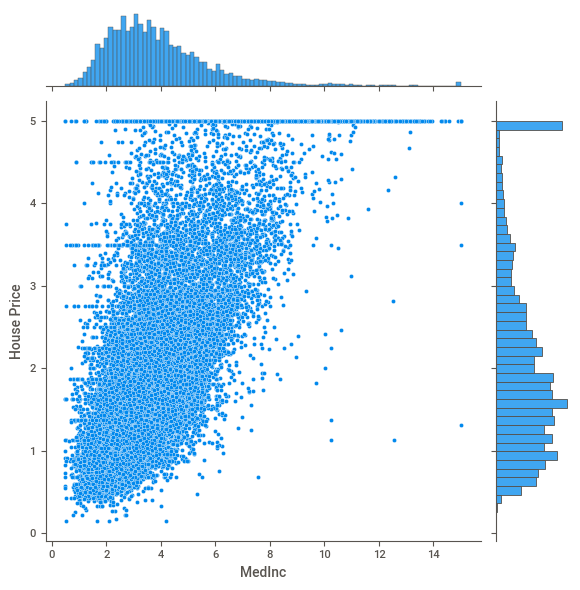

In [ ]:
sns.jointplot(x=df1["MedInc"], y=df1["House Price"]);

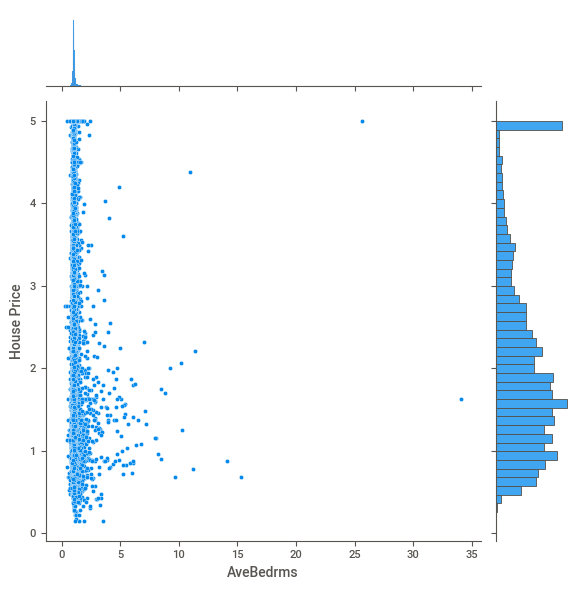

In [ ]:
sns.jointplot(x=df1["AveBedrms"], y=df1["House Price"]);

# Pre Processing




In [ ]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

s_scaler = StandardScaler()

X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

## KNR Implementation

In [ ]:
class KNeighborsRegressor():
    
  def __init__(self,k):
    self.k = k
    
  def fit(self,X,y):
   	 
    self.X_train = X
    self.y_train = y

  def predictions(self,x):
   	 
    distances = [euclid_distance(x,x_train) for x_train in self.X_train]
   	 
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
   	 
    y_pred = np.mean(k_nearest_labels)
   	 
    return y_pred
    
   	 
  def predict(self,X):
   	 
    predicted_labels = [self.predictions(x) for x in X]
       	 
    return np.array(predicted_labels)
     
def euclid_distance(a,b):
    
	dist = (a-b)**2
	return np.sqrt(np.sum(dist))

## Determining K value

In [ ]:
TestKvals = pd.DataFrame()
tmp = {}

for i in range(10,30):

  Kval = i
  tmp["Kval"] = Kval

  model = KNeighbourRegressor(Kval)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  tmp["R2_val"] = (r2_score(y_test, y_pred))

  TestKvals = TestKvals.append([tmp])


TestKvals.set_index("Kval", inplace = True)

fig, axes = plt.subplots(ncols=1, figsize=(10,4))
TestKvals.R2_val.plot(ax=axes, kind="line", title="R2 Score")
plt.ylabel('Accuracy')
plt.title('KNN Accuracy/Kval')
plt.show()


# Understanding which model to use


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


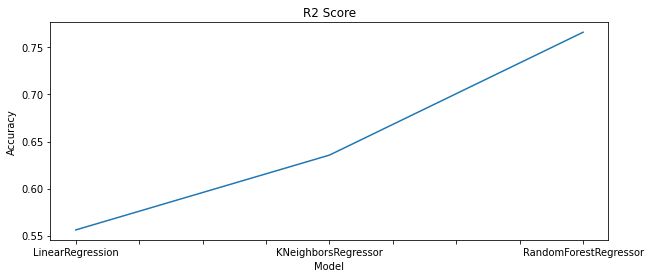

In [ ]:
models = [ LinearRegression(), KNeighborRegressor(20), RandomForestRegressor() ]

TestModels = pd.DataFrame()
tmp = {}

for model in models:
  print(model)
  m_name = str(model)
  tmp["Model"] = m_name[:m_name.index("(")]

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  tmp["R2_val"] = (r2_score(y_test, y_pred))

  TestModels = TestModels.append([tmp])

TestModels.set_index("Model", inplace = True)

fig, axes = plt.subplots(ncols=1, figsize=(10,4))
TestModels.R2_val.plot(ax=axes, kind="line", title="R2 Score")
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# model prediction

y_pred = model.predict(X_test)
print(y_pred)

[0.27038875 0.54496724 0.46170559 ... 0.41702539 0.46172416 0.59865571]


## Accuracy of the model

In [ ]:
MSE_score = MSE(y_test,y_pred)

print('R2 score', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test,
y_pred))
print('Mean Squared Error:', MSE_score.mean())
print('Root Mean Squared Error:', np.sqrt(MSE_score))


R2 score 0.7661347030758191
Mean Absolute Error: 0.08079751176869304
Mean Squared Error: 0.01399506695335315
Root Mean Squared Error: 0.11830074789853676


# Comparing with Actual

In [ ]:
dframe = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
dframe.head(25)

,Actual,Predicted
0,0.194022,0.270389
1,0.294228,0.544967
2,0.453402,0.461706
3,1.000000,0.991102
4,0.051136,0.087650
5,0.269485,0.250873
6,0.261238,0.389873
7,0.229692,0.297574
8,0.099383,0.123569
9,0.557113,0.550605


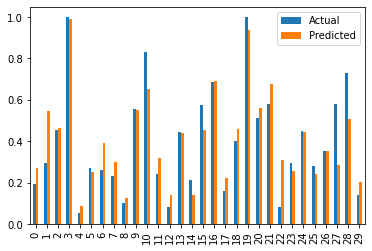

In [ ]:
graph = dframe.head(30)
graph.plot(kind='bar')

# Verifying Model with custom input

In [ ]:
custom_inp = np.array([2.3125,	38.0,	4.450000,	0.950000,	196.0,	3.266667,	89])

In [ ]:
custom_inp.shape
custom_inp = custom_inp.reshape(1,-1)


In [ ]:
model.predict(custom_inp)

array([38.2708479])